# 5-1 원-핫 인코딩 (One-hot encoding)

원-핫 인코딩 : 범주형(category) 변수를 binary하게 표현한 것

선택해야 하는 선택지의 개수만큼의 차원을 가지면서, 

선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소는 0의 값을 가지도록 하는 표현 방법

원-핫 인코딩으로 표현된 벡터를 원-핫 벡터(one-hot vector)라고 함

ex. 강아지 = [1,0], 고양이 = [0,1]

## 원-핫 인코딩의 특징 : 무작위성

원-핫 인코딩으로 나타낸 레이블은 **모든 쌍에 대해서 유클리드 거리가 동일**하다는 특징이 있음

일반적으로 **유클리드 거리는 클래스간의 관계**를 의미하는데, 

원-핫 인코딩은 유클리드 거리가 동일하므로 **클래스간의 연관성이 없는 분류 문제에서 주로 사용함**

ex. 주어진 손글씨가 0-9중 어떤 수인가? : 0-9 레이블 간 연관이 없으므로 원-핫 인코딩 사용

cf. 위 예시에서 정수 인코딩을 하면 예측값 = 2, y = 1일 때 MSE = 1 / 예측값 = 3, y = 1일 때 MSE = 4 이므로 

'1과 2의 거리 < 1과 3의 거리' 즉, 1은 3보다 2와 가깝다는 정보를 줄 수 있음

하지만 실제로 손글씨가 어떤 클래스인지의 문제에서 클래스간의 연관성은 없기 때문에 

잘못된 정보를 기계에게 줄 수 있음 -> 원-핫 인코딩으로 이런 문제 해결 가능

# 5-2 소프트맥스 회귀 (Softmax Regression)

다중 분류(Multi Classification) 문제에서 주로 사용됨

각 클래스마다 '정답일 확률'을 할당하며, 전체 클래스의 확률 합은 1이 되어야 함

## 소프트맥스 함수

**각 클래스에 대한 확률 벡터를 반환**하는 함수

정의 : $e^x$(exp)를 적용하여 모든 원소를 양수로 바꿔주고, 산술평균을 적용하여 총합이 1이 되게 함

k차원 입력 벡터에 대해 $z_i$가 i번째 원소, $p_i$가 i번째 클래스일 확률이라 하면 $p_i$를 아래와 같이 정의함

$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$

ex. 클래스가 3개일 때 소프트맥스 함수가 반환하는 벡터

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$

## 소프트맥스 회귀 실습

순서

1) 입력 X에 가중치 W를 곱하고 b를 더하여 소프트맥스 함수에 입력

2) 소프트맥스 함수는 확률 벡터를 반환

3) 2에서 반환된 확률 벡터와 원-핫 인코딩된 라벨의 오차를 계산 (교차 엔트로피)

4) 3에서 계산된 오차로부터 W와 b를 업데이트

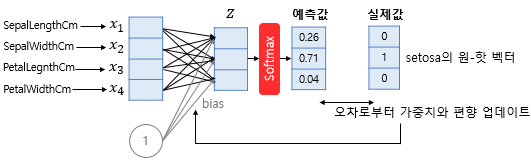

### 교차 엔트로피

본 예제의 손실 함수 : 교차 엔트로피

교차 엔트로피를 유도하는 것은 정보 이론에 관련된 것이므로 생략

**엔트로피 함수** : 불확실성을 수치화한 값 

$H(P) = -\sum_{i=1}^{n}p(x_{i})\ log_2p(x_{i})$ 

(n: 모든 사건의 수, $p(x_i)$: 사건이 일어날 확률)

**교차 엔트로피 함수** : 두 확률 분포 사이의 거리 

$H(P,Q) = -\sum_{i=1}^{k}q(x_{i})\ log_2p(x_{i})$ 

(k: 확률 분포의 차원, $p(x), q(x)$: 확률 분포)

**손실 함수로서의 교차 엔트로피** : 교차 엔트로피의 평균 

$cost(W) = - \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{C} q(x_j)log_2(p(x_j))$ 

($n$: 데이터 수, $C$: 클래스 수, $q(x_j)$: 원-핫 벡터, $p(x_j)$: 소프트맥스의 확률 벡터)

참고 : https://3months.tistory.com/436

# 5-3 소프트맥스 회귀 구현하기

In [1]:
import torch
import torch.nn.functional as F
torch.manual_seed(1)

### 소프트맥스 함수 구현

F.softmax로 파이토치에서 제공하는 소프트맥스 함수를 사용할 수 있음

In [2]:
z = torch.FloatTensor([1, 2, 3])

In [3]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [4]:
# 확률 벡터의 합 = 1
hypothesis.sum()

tensor(1.)

### 랜덤 행렬, 랜덤 레이블 생성

In [5]:
# 3x5 크기의 랜덤 행렬 생성
x = torch.rand(3, 5, requires_grad=True)

In [6]:
# softmax로 확률 벡터 생성
hypothesis = F.softmax(x, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [7]:
# 0~4 사이의 랜덤한 3개의 레이블 생성
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [8]:
# hypothesis와 크기가 동일한 zeros 행렬 생성
y_one_hot = torch.zeros_like(hypothesis)

# y의 크기를 (3,)에서 (3,1)로 변경
y_unsqueeze = y.unsqueeze(1)

# y_unsqueeze의 위치에 1을 scatter (천번쨰 인자의 1은 dim = 1을 의미)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

### 교차 엔트로피 구현

$cost(W) = - \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{C} q(x_j)log_2(p(x_j))$ 

$q(x_j)*-log_2(p(x_j))$ : 텐서 연산이므로 형식 그대로 작성

$\sum_{j=1}^{C}$ : sum으로 구현

$\frac{1}{n} \sum_{i=1}^{n}$ : mean으로 구현

In [9]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


### 교차 엔트로피 구현 (함수 이용)

**1. F.softmax() + torch.log() = F.log_softmax()**

앞서 `torch.log(hypothesis)`에서 hypothesis는 소프트맥스 함수값임

소프트맥스 함수값(=확률벡터)를 이용해 loss를 구해야 하므로 당연한 결과!

따라서 파이토치에서는 **소프트맥스와 log를 한번에 계산할 수 있는 함수 F.log_softmax( )**를 제공함

In [10]:
# Low level
torch.log(F.softmax(x, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [11]:
# High level
F.log_softmax(x, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

**2. F.log_softmax() + F.nll_loss() = F.cross_entropy()**

F.log_softmax() 함수를 사용해도 여전히 계산이 복잡함

`(y_one_hot * - F.log_softmax(x, dim=1)).sum(dim=1).mean()`

따라서 파이토치에서는 F.log_softmax() 이후의 연산을 한번에 해줄 **F.nll_loss()** 함수를 제공함

`F.nll_loss(F.log_softmax(x, dim=1), y)`

마지막으로 이 모든 과정을 한번에 해줄 **F.cross_entropy()**를 통해 교차 엔트로피 함수를 구현할 수 있음

`F.cross_entropy(x, y)`

In [12]:
# Low level
(y_one_hot * - F.log_softmax(x, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [13]:
# High level : F.nll_loss()
F.nll_loss(F.log_softmax(x, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [14]:
# High level : F.cross_entropy()
F.cross_entropy(x, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

# 5-4 소프트맥스 회귀 구현하기

In [15]:
# 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [16]:
# 데이터 로드
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [17]:
print(x_train.shape) # [8x4]
print(y_train.shape) # [8,] 3개의 클래스

torch.Size([8, 4])
torch.Size([8])


In [18]:
# one hot encoding
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1) # y_train 자리에 1을 scatter
print(y_one_hot)

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])


In [19]:
# W,b 초기화
W = torch.zeros((4, 3), requires_grad=True) # X = 8x4, Y = 8x3 이므로 W = 4x3 이여야함
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

In [20]:
# W,b 최적화
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


# 5-5 소프트맥스 회귀로 MNIST 데이터 분류하기

In [21]:
# 임포트
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

cf. torchvision은 유명한 데이터셋, 모델, 이미지 전처리 도구를 포함하는 패키지

In [22]:
# GPU, CPU 중 선택
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


In [23]:
# 랜덤 시드 고정
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [24]:
# hyperparameters
training_epochs = 10
batch_size = 100

In [25]:
# MNIST dataset 로드
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

root : MNIST 데이터를 다운로드 받을 경로

train : True이면 훈련 데이터를, False이면 테스트 데이터를 리턴받음

transform : 현재 데이터를 파이토치 텐서로 변환

download : 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미

In [26]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, # 배치 크기는 100
                         shuffle=True,
                         drop_last=True)

dataset : 로드할 데이터 셋

batch_size : 배치 크기

shuffle : 매 에포크마다 미니 배치를 셔플할 것인지의 여부

drop_last : 마지막 배치를 버릴 것인지를 의미

cf. drop_last = False 이면 배치 단위로 짤리지 않은 데이터를 버리지 않고 학습하게 되는데, 

이때 남은 데이터 수가 적으면 마지막 배치가 과대평가 되는 위험이 있음

In [27]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10).to(device)

입력 dim : 28x28 픽셀의 이미지이므로 784

출력 dim : 0~9 를 원-핫 인코딩으로 출력하므로 10

**to()** 함수는 어디에서 연산할 지 결정

In [28]:
# 옵티마이저 정의
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [29]:
for epoch in range(training_epochs): # 앞서 training_epochs = 10으로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)
    
    # 데이터 로더의 반복문이므로 X,Y는 100개씩 호출됨
    for X, Y in data_loader:
        # 100x1x28x28 -> 100x784
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = F.cross_entropy(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577715
Epoch: 0003 cost = 0.331264257
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956169
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Learning finished


Accuracy: 0.8916000127792358
Label:  8
Prediction:  3


C:\Users\panda\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\panda\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


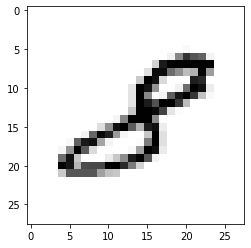

In [30]:
# 성능 테스트
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test # argmax로 one-hot encoding을 정수로 인코딩
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()